In [245]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

In [246]:
df=pd.read_csv('E0 (1).csv')
df2 = pd.read_csv('E0 (2).csv')
df3 =pd.read_csv('E0 (3).csv')
df4 = pd.read_csv('E0 (4).csv')
df5 = pd.read_csv('E0 (5).csv')

In [247]:
new_df = df.append(df2)
new_df = new_df.append(df3)
new_df = new_df.append(df4)
new_df = new_df.append(df5)

/Users/carterbouley/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [249]:
new_df = new_df[['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC',
       'AC', 'HY', 'AY', 'HR', 'AR', 'PSH', 'PSD', 'PSA' ]]

new_df.drop(columns = 'Div', inplace = True)

In [250]:
new_df2 = new_df.copy()

new_df['Team'] = new_df.HomeTeam
new_df['Opponent'] = new_df.AwayTeam

new_df2['Team'] = new_df.AwayTeam
new_df2['Opponent'] = new_df.HomeTeam

df3 = pd.concat([new_df, new_df2])

In [251]:
def home_away_numerical(df):
    """
    Simple function to assign a numerical value to whether a team is home/away. In this case, home=1 away=0. Same methodology
    as above, chunk list to pd.concat().
    """
    team_list = df.HomeTeam.unique()
    chunks = []
    for team in team_list:
        all_games = df[df['Team']==team]
        all_games['HomeAway'] = 1
        all_games.loc[all_games['AwayTeam']==team,'HomeAway'] = 0
        chunks.append(all_games)
    dataframe = pd.concat(chunks,ignore_index=True)
    return dataframe


In [252]:
df3 = home_away_numerical(df3) # generates home dummy variable for home or away

/Users/carterbouley/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/carterbouley/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [254]:
df4 = df3[['Team', 'Opponent', 'HomeAway', 'Date',  'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Referee','HST', 'AST', 'HC',
       'AC', 'HR', 'AR', 'PSH', 'PSD', 'PSA', ]].copy()

In [255]:
team_list = new_df.HomeTeam.unique()
team_list = team_list.tolist()

list_of_hthg = []
for team in team_list:
    dfnew = df4.loc[(df4.Team==team) & (df4.HomeAway == 1)]['HTHG'].mean()
    list_of_hthg.append(dfnew)
    
team_list = df4.Team.unique()
team_list = team_list.tolist()
 
average_hthg = dict(zip(team_list, list_of_hthg))

list_of_htag = []
for team in team_list:
    dfnew = df4.loc[(df4.Team==team) & (df4.HomeAway == 0)]['HTAG'].mean()
    list_of_htag.append(dfnew)
    
team_list = df4.Team.unique()
team_list = team_list.tolist()
 
average_htag = dict(zip(team_list, list_of_htag))

list_of_fthg = []
for team in team_list:
    dfnew = df4.loc[(df4.Team==team) & (df4.HomeAway == 1)]['FTHG'].mean()
    list_of_fthg.append(dfnew)
    
team_list = df4.Team.unique()
team_list = team_list.tolist()
 
average_fthg = dict(zip(team_list, list_of_fthg))

list_of_ftag = []
for team in team_list:
    dfnew = df4.loc[(df4.Team==team) & (df4.HomeAway == 0)]['FTAG'].mean()
    list_of_ftag.append(dfnew)
    
team_list = df4.Team.unique()
team_list = team_list.tolist()
 
average_ftag = dict(zip(team_list, list_of_ftag))

list_of_hst = []
for team in team_list:
    dfnew = df4.loc[(df4.Team==team) & (df4.HomeAway == 1)]['HST'].mean()
    list_of_hst.append(dfnew)
    
team_list = df4.Team.unique()
team_list = team_list.tolist()
 
average_hst = dict(zip(team_list, list_of_hst))

list_of_ast = []
for team in team_list:
    dfnew = df4.loc[(df4.Team==team) & (df4.HomeAway == 0)]['AST'].mean()
    list_of_ast.append(dfnew)
    
team_list = df4.Team.unique()
team_list = team_list.tolist()
 
average_ast = dict(zip(team_list, list_of_ast))

list_of_hc = []
for team in team_list:
    dfnew = df4.loc[(df4.Team==team) & (df4.HomeAway == 1)]['HC'].mean()
    list_of_hc.append(dfnew)
    
team_list = df4.Team.unique()
team_list = team_list.tolist()
 
average_hc = dict(zip(team_list, list_of_hc))

list_of_ac = []
for team in team_list:
    dfnew = df4.loc[(df4.Team==team) & (df4.HomeAway == 0)]['AC'].mean()
    list_of_ac.append(dfnew)
    
team_list = df4.Team.unique()
team_list = team_list.tolist()
 
average_ac = dict(zip(team_list, list_of_ac))

list_of_hr = []
for team in team_list:
    dfnew = df4.loc[(df4.Team==team) & (df4.HomeAway == 1)]['HR'].mean()
    list_of_hr.append(dfnew)
    
team_list = df4.Team.unique()
team_list = team_list.tolist()
 
average_hr = dict(zip(team_list, list_of_hr))

list_of_ar = []
for team in team_list:
    dfnew = df4.loc[(df4.Team==team) & (df4.HomeAway == 0)]['AR'].mean()
    list_of_ar.append(dfnew)
    
team_list = df4.Team.unique()
team_list = team_list.tolist()
 
average_ar = dict(zip(team_list, list_of_ar))

In [277]:
new_df.Date = pd.to_datetime(new_df.Date, infer_datetime_format=True)
df_final =  new_df.sort_values(by='Date', ascending = True) 

In [278]:
df_final.shape

(1670, 28)

In [280]:
df_final['average_halftimehomegoals'] = df_final['HomeTeam'].map(average_hthg)
df_final['average_halftimeawaygoals'] = df_final['AwayTeam'].map(average_htag)
df_final['average_fulltimehomegoals'] = df_final['HomeTeam'].map(average_fthg)
df_final['average_fulltimeawaygoals'] = df_final['AwayTeam'].map(average_ftag)
df_final['average_hometeamshotsontarget'] = df_final['HomeTeam'].map(average_hst)
df_final['average_awayteamshotsontarget'] = df_final['AwayTeam'].map(average_ast)
df_final['average_homecorners'] = df_final['HomeTeam'].map(average_hc)
df_final['average_awaycorners'] = df_final['AwayTeam'].map(average_ac)
df_final['average_homereds'] = df_final['HomeTeam'].map(average_hr)
df_final['average_awayreds'] = df_final['AwayTeam'].map(average_ar)

In [281]:
df_final.columns

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG',
       'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC',
       'HY', 'AY', 'HR', 'AR', 'PSH', 'PSD', 'PSA', 'Team', 'Opponent',
       'Date1', 'average_halftimehomegoals', 'average_halftimeawaygoals',
       'average_fulltimehomegoals', 'average_fulltimeawaygoals',
       'average_hometeamshotsontarget', 'average_awayteamshotsontarget',
       'average_homecorners', 'average_awaycorners', 'average_homereds',
       'average_awayreds'],
      dtype='object')

In [282]:
df_final['avg_half_timegoals_homevsawayratio'] = df_final['average_halftimehomegoals']/df_final['average_halftimeawaygoals'] 


df_final['avg_full_timegoals_homevsawayratio'] = df_final['average_fulltimehomegoals']/df_final['average_fulltimeawaygoals'] 

df_final['avg_full_timeshotsontarget_homevsawayratio'] = df_final['average_hometeamshotsontarget']/df_final['average_awayteamshotsontarget']
df_final['avg_corners_homevsawayratio'] = df_final['average_homecorners']/df_final['average_awaycorners'] 
df_final['avg_reds_homevsawayratio'] = df_final['average_homereds']/df_final['average_awayreds'] 


In [283]:
df_final.set_index('Date', inplace = True)

In [284]:
df_final.reset_index()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,average_awayteamshotsontarget,average_homecorners,average_awaycorners,average_homereds,average_awayreds,avg_half_timegoals_homevsawayratio,avg_full_timegoals_homevsawayratio,avg_full_timeshotsontarget_homevsawayratio,avg_corners_homevsawayratio,avg_reds_homevsawayratio
0,2015-08-08,Bournemouth,Aston Villa,0,1,A,0,0,D,M Clattenburg,...,3.370370,5.698795,4.037037,0.048193,0.111111,1.915663,1.600482,1.319079,1.411628,0.433735
1,2015-08-08,Chelsea,Swansea,2,2,D,2,1,H,M Oliver,...,3.017544,6.880952,3.824561,0.071429,0.017544,2.510714,2.221989,2.027824,1.799148,4.071429
2,2015-08-08,Everton,Watford,2,2,D,0,1,A,M Jones,...,3.345238,5.963855,4.333333,0.036145,0.095238,1.518072,1.743649,1.404622,1.376274,0.379518
3,2015-08-08,Leicester,Sunderland,4,2,H,3,0,H,L Mason,...,3.315789,5.702381,3.552632,0.059524,0.078947,1.744898,1.583333,1.385865,1.605115,0.753968
4,2015-08-08,Man United,Tottenham,1,0,H,1,0,H,J Moss,...,5.130952,6.333333,5.488095,0.023810,0.071429,0.970588,0.920530,1.055684,1.154013,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1665,2019-12-04,Liverpool,Everton,5,2,H,4,2,H,M Dean,...,4.000000,6.869048,4.559524,0.035714,0.154762,2.204545,2.195652,1.651786,1.506527,0.230769
1666,2019-12-04,Chelsea,Aston Villa,2,1,H,1,1,D,C Kavanagh,...,3.370370,6.880952,4.037037,0.071429,0.111111,2.642857,2.147143,1.815542,1.704456,0.642857
1667,2019-12-04,Leicester,Watford,2,0,H,0,0,D,C Pawson,...,3.345238,5.702381,4.333333,0.059524,0.095238,1.350000,1.602410,1.373665,1.315934,0.625000
1668,2019-12-05,Sheffield United,Newcastle,0,2,A,0,1,A,S Attwell,...,3.492308,7.625000,3.938462,0.125000,0.076923,1.400862,1.305804,1.216960,1.936035,1.625000


In [285]:
df_final['hometeampreviousyearleagueposition'] = 0

In [286]:
league1415 = pd.read_csv('14:15league-table.csv')
league1516 = pd.read_csv('15:16league-table.csv')
league1617 = pd.read_csv('16:17league-table.csv')
league1718 = pd.read_csv('17:18league-table.csv')
league1819 = pd.read_csv('18:19league-table.csv')

In [287]:
list_of_leagues = [league1415,
league1516,
league1617,
league1718,
league1819]

In [288]:
def convert_to_dict(standings):
    league = standings[['Position', 'Team']]
    league = dict(zip(leage.Team, leage.Position))
    return league

In [289]:
convert_to_dict(league1415)

{'Liverpool': 1,
 'Manchester City': 2,
 'Leicester City': 3,
 'Chelsea': 4,
 'Manchester United': 5,
 'Wolverhampton Wanderers': 6,
 'Sheffield United': 7,
 'Tottenham Hotspur': 8,
 'Arsenal': 9,
 'Burnley': 10,
 'Crystal Palace': 11,
 'Everton': 12,
 'Newcastle United': 13,
 'Southampton': 14,
 'Brighton & Hove Albion': 15,
 'West Ham United': 16,
 'Watford': 17,
 'AFC Bournemouth': 18,
 'Aston Villa': 19,
 'Norwich City': 20}

In [209]:

for league in list_of_leages:
    league = leage[['Position', 'Team']]
    league = dict(zip(leage.Team, leage.Position))

In [313]:
df_final = df_final.reset_index()

In [303]:
df_final = df_final.sort_values(by='Date')

In [317]:
df_final.loc[(df_final['Date'] >= '2015-08-08') & (df_final['Date'] <= '2016-05-17'),
             'hometeampreviousyearleagueposition'] = df_final['HomeTeam'].map(convert_to_dict(league1415))
df_final.loc[(df_final['Date'] >= '2016-08-12') & (df_final['Date'] <= '2017-05-22'),
             'hometeampreviousyearleagueposition'] = df_final['HomeTeam'].map(convert_to_dict(league1516))
df_final.loc[(df_final['Date'] >= '2017-08-11') & (df_final['Date'] <= '2018-05-13'),
             'hometeampreviousyearleagueposition'] = df_final['HomeTeam'].map(convert_to_dict(league1617))
df_final.loc[(df_final['Date'] >= '2018-08-10') & (df_final['Date'] <= '2019-05-12'),
             'hometeampreviousyearleagueposition'] = df_final['HomeTeam'].map(convert_to_dict(league1718))
df_final.loc[(df_final['Date'] >= '2019-08-09') & (df_final['Date'] <= '2019-12-12'),
             'hometeampreviousyearleagueposition'] = df_final['HomeTeam'].map(convert_to_dict(league1819))

In [322]:
df_final.loc[(df_final['Date'] >= '2015-08-08') & (df_final['Date'] <= '2016-05-17'),
             'awayteampreviousyearleagueposition'] = df_final['AwayTeam'].map(convert_to_dict(league1415))
df_final.loc[(df_final['Date'] >= '2016-08-12') & (df_final['Date'] <= '2017-05-22'),
             'awayteampreviousyearleagueposition'] = df_final['AwayTeam'].map(convert_to_dict(league1516))
df_final.loc[(df_final['Date'] >= '2017-08-11') & (df_final['Date'] <= '2018-05-13'),
             'awayteampreviousyearleagueposition'] = df_final['AwayTeam'].map(convert_to_dict(league1617))
df_final.loc[(df_final['Date'] >= '2018-08-10') & (df_final['Date'] <= '2019-05-12'),
             'awayteampreviousyearleagueposition'] = df_final['AwayTeam'].map(convert_to_dict(league1718))
df_final.loc[(df_final['Date'] >= '2019-08-09') & (df_final['Date'] <= '2019-12-12'),
             'awayteampreviousyearleagueposition'] = df_final['AwayTeam'].map(convert_to_dict(league1819))

In [327]:
df_final.hometeampreviousyearleagueposition.fillna(22, inplace = True)
df_final.awayteampreviousyearleagueposition.fillna(22, inplace = True)
df_final.dropna(inplace = True)

In [335]:
df_final['homevsaway_standingsratio'] = df_final['hometeampreviousyearleagueposition']/df_final['awayteampreviousyearleagueposition']

In [336]:
df_final.columns

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG',
       'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC',
       'HY', 'AY', 'HR', 'AR', 'PSH', 'PSD', 'PSA', 'Team', 'Opponent',
       'Date1', 'average_halftimehomegoals', 'average_halftimeawaygoals',
       'average_fulltimehomegoals', 'average_fulltimeawaygoals',
       'average_hometeamshotsontarget', 'average_awayteamshotsontarget',
       'average_homecorners', 'average_awaycorners', 'average_homereds',
       'average_awayreds', 'avg_half_timegoals_homevsawayratio',
       'avg_full_timegoals_homevsawayratio',
       'avg_full_timeshotsontarget_homevsawayratio',
       'avg_corners_homevsawayratio', 'avg_reds_homevsawayratio',
       'hometeampreviousyearleagueposition',
       'awayteampreviousyearleagueposition', 'homevsaway_standingsratio'],
      dtype='object')

In [337]:
df_odds = df_final[['PSH', 'PSD', 'PSA']]

In [340]:
df_ftr = df_final[['FTR']]

In [347]:
df_dates = df_final[['Date']]

In [ ]:
df_teams = [['HomeTeam', 'AwayTeam']]

In [352]:
df_final = df_final[['average_halftimehomegoals', 'average_halftimeawaygoals',
       'average_fulltimehomegoals', 'average_fulltimeawaygoals',
       'average_hometeamshotsontarget', 'average_awayteamshotsontarget',
       'average_homecorners', 'average_awaycorners', 'average_homereds',
       'average_awayreds', 'avg_half_timegoals_homevsawayratio',
       'avg_full_timegoals_homevsawayratio',
       'avg_full_timeshotsontarget_homevsawayratio',
       'avg_corners_homevsawayratio', 'avg_reds_homevsawayratio',
       'hometeampreviousyearleagueposition',
       'awayteampreviousyearleagueposition', 'homevsaway_standingsratio']]

In [353]:
len(df_final)

1669

In [354]:
x_train = df_final[:1289]
x_test = df_final[1289:]
y_train = df_ftr[:1289]
y_test = df_ftr[1289:]

In [355]:
tree = DecisionTreeClassifier()

tree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [356]:
tree.score(x_train, y_train)


0.7331264546159814

In [383]:
x_test.loc[(x_test == np.inf).any(axis=1), 'avg_reds_homevsawayratio'] = 15

/Users/carterbouley/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [384]:
df1 = x_test[(x_test == np.inf).any(axis=1)]

In [385]:
df1

,average_halftimehomegoals,average_halftimeawaygoals,average_fulltimehomegoals,average_fulltimeawaygoals,average_hometeamshotsontarget,average_awayteamshotsontarget,average_homecorners,average_awaycorners,average_homereds,average_awayreds,avg_half_timegoals_homevsawayratio,avg_full_timegoals_homevsawayratio,avg_full_timeshotsontarget_homevsawayratio,avg_corners_homevsawayratio,avg_reds_homevsawayratio,hometeampreviousyearleagueposition,awayteampreviousyearleagueposition,homevsaway_standingsratio


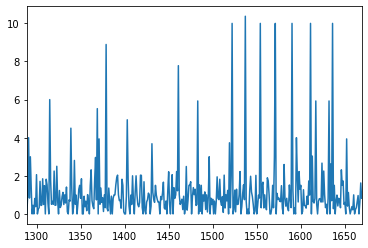

In [386]:
x_test.avg_reds_homevsawayratio.plot()

In [390]:
preds = tree.predict_proba(x_test)

In [392]:
y_test

,FTR
1289,A
1290,A
1291,H
1292,A
1293,H
...,...
1665,H
1666,H
1667,H
1668,A


In [391]:
preds

array([[0.5       , 0.        , 0.5       ],
       [0.66666667, 0.        , 0.33333333],
       [0.        , 0.66666667, 0.33333333],
       ...,
       [0.        , 0.        , 1.        ],
       [0.5       , 0.        , 0.5       ],
       [0.        , 0.        , 1.        ]])

In [388]:
accuracy_score(y_test, preds)

0.45263157894736844

In [389]:
tree.classes_


array(['A', 'D', 'H'], dtype=object)